In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
data = pd.read_csv('dataset.csv')
data.head()

,activityID,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,hand magnetometer X,...,ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z,PeopleId
0,transient activities,104.0,30.0,2.37223,8.60074,3.51048,-0.092217,0.056812,-0.015845,14.6806,...,9.65918,-1.65569,-0.099797,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1
1,transient activities,104.0,30.0,2.18837,8.56560,3.66179,-0.024413,0.047759,0.006474,14.8991,...,9.69370,-1.57902,-0.215687,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1
2,transient activities,104.0,30.0,2.37357,8.60107,3.54898,-0.057976,0.032574,-0.006988,14.2420,...,9.58944,-1.73276,0.092914,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1
3,transient activities,104.0,30.0,2.07473,8.52853,3.66021,-0.002352,0.032810,-0.003747,14.8908,...,9.58814,-1.77040,0.054545,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1
4,transient activities,104.0,30.0,2.22936,8.83122,3.70000,0.012269,0.018305,-0.053325,15.5612,...,9.69771,-1.65625,-0.060809,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1


## EDA

In [6]:
# Display basic info
print("Basic Info:")
data.info()

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864056 entries, 0 to 2864055
Data columns (total 33 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   activityID                 object 
 1   heart_rate                 float64
 2   hand temperature (°C)      float64
 3   hand acceleration X ±16g   float64
 4   hand acceleration Y ±16g   float64
 5   hand acceleration Z ±16g   float64
 6   hand gyroscope X           float64
 7   hand gyroscope Y           float64
 8   hand gyroscope Z           float64
 9   hand magnetometer X        float64
 10  hand magnetometer Y        float64
 11  hand magnetometer Z        float64
 12  chest temperature (°C)     float64
 13  chest acceleration X ±16g  float64
 14  chest acceleration Y ±16g  float64
 15  chest acceleration Z ±16g  float64
 16  chest gyroscope X          float64
 17  chest gyroscope Y          float64
 18  chest gyroscope Z          float64
 19  chest magnetometer X       flo

In [7]:
# Check for missing values
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
activityID                    0
heart_rate                   46
hand temperature (°C)         0
hand acceleration X ±16g      0
hand acceleration Y ±16g      0
hand acceleration Z ±16g      0
hand gyroscope X              0
hand gyroscope Y              0
hand gyroscope Z              0
hand magnetometer X           0
hand magnetometer Y           0
hand magnetometer Z           0
chest temperature (°C)        0
chest acceleration X ±16g     0
chest acceleration Y ±16g     0
chest acceleration Z ±16g     0
chest gyroscope X             0
chest gyroscope Y             0
chest gyroscope Z             0
chest magnetometer X          0
chest magnetometer Y          0
chest magnetometer Z          0
ankle temperature (°C)        0
ankle acceleration X ±16g     0
ankle acceleration Y ±16g     0
ankle acceleration Z ±16g     0
ankle gyroscope X             0
ankle gyroscope Y             0
ankle gyroscope Z             0
ankle magnetometer X          0
ankle magnetometer Y    

In [8]:
# drop missing values
data = data.dropna(subset=['heart_rate'])

# confirm removal
print(data.isnull().sum())

activityID                   0
heart_rate                   0
hand temperature (°C)        0
hand acceleration X ±16g     0
hand acceleration Y ±16g     0
hand acceleration Z ±16g     0
hand gyroscope X             0
hand gyroscope Y             0
hand gyroscope Z             0
hand magnetometer X          0
hand magnetometer Y          0
hand magnetometer Z          0
chest temperature (°C)       0
chest acceleration X ±16g    0
chest acceleration Y ±16g    0
chest acceleration Z ±16g    0
chest gyroscope X            0
chest gyroscope Y            0
chest gyroscope Z            0
chest magnetometer X         0
chest magnetometer Y         0
chest magnetometer Z         0
ankle temperature (°C)       0
ankle acceleration X ±16g    0
ankle acceleration Y ±16g    0
ankle acceleration Z ±16g    0
ankle gyroscope X            0
ankle gyroscope Y            0
ankle gyroscope Z            0
ankle magnetometer X         0
ankle magnetometer Y         0
ankle magnetometer Z         0
PeopleId

ActivityID Distribution:
transient activities    927529
walking                 238761
ironing                 238690
lying                   192523
standing                189931
Nordic walking          188107
sitting                 185188
vacuum cleaning         175353
cycling                 164600
ascending stairs        117216
descending stairs       104944
running                  98199
rope jumping             42969
Name: activityID, dtype: int64


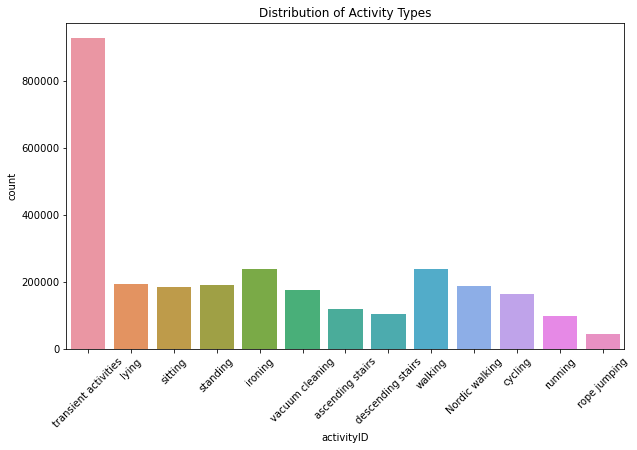

In [11]:
# Distribution of the target
print("ActivityID Distribution:")
print(data['activityID'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='activityID')
plt.xticks(rotation=45)
plt.title('Distribution of Activity Types')
plt.show()

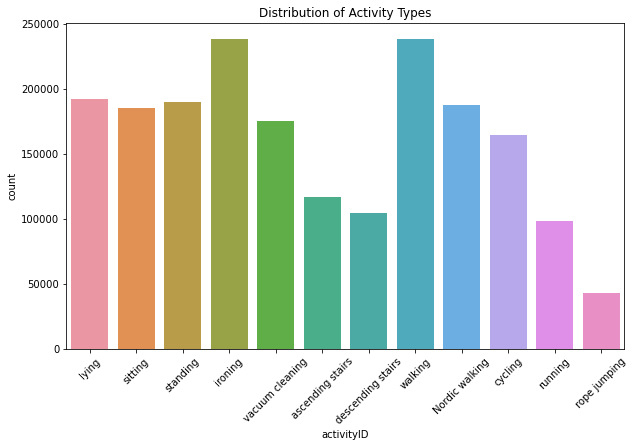

In [12]:
# Distribution of the target after removing 'transient activities'
data = data[data['activityID'] != 'transient activities']

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='activityID')
plt.xticks(rotation=45)
plt.title('Distribution of Activity Types')
plt.show()

In [13]:
# Separate features and target
features = data.iloc[:, 1:]  # All columns except the target 'activityID'
target = data['activityID']

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(features)

/var/folders/5k/d_wyvmc5079d7nhnlp_36h0h0000gn/T/ipykernel_24914/2452541406.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


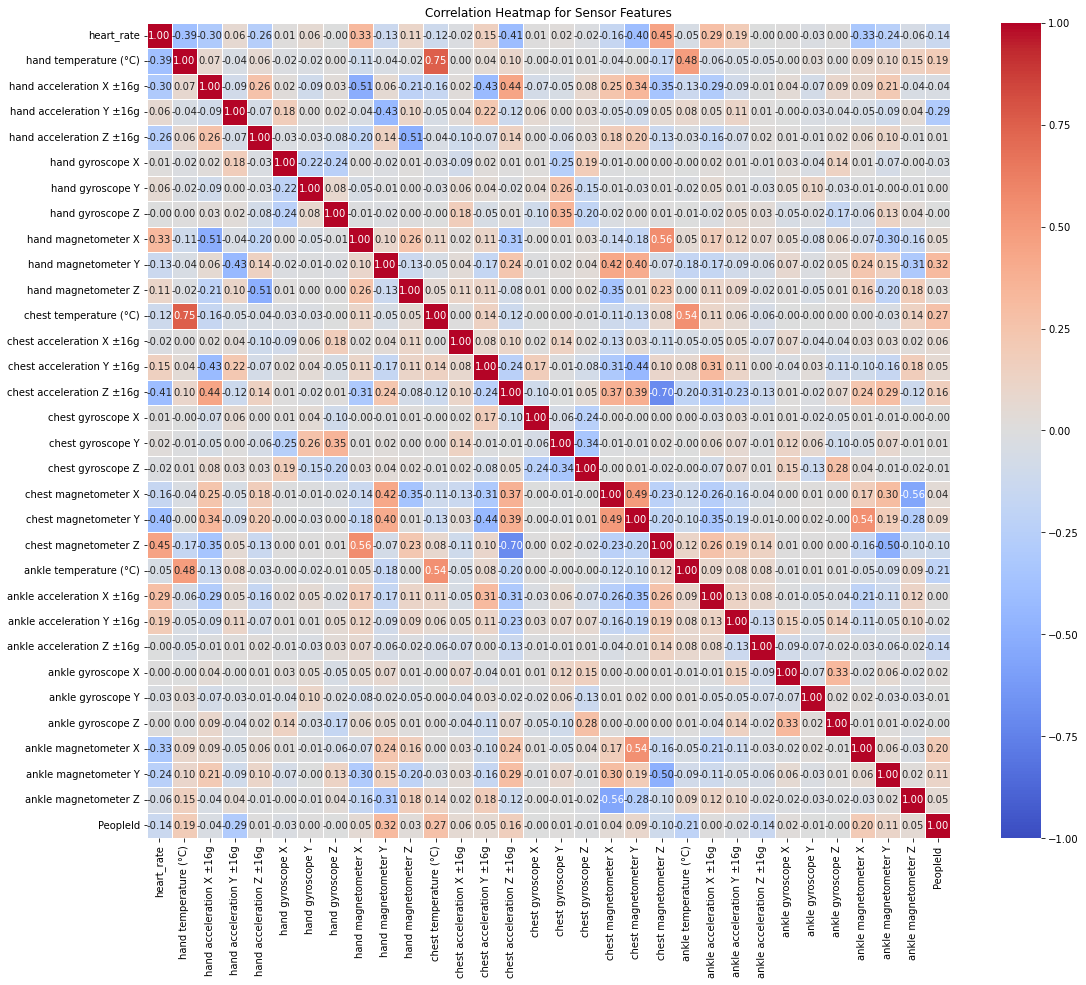

In [14]:
# Correlation heatmap with correlation values displayed
plt.figure(figsize=(18, 15))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Heatmap for Sensor Features")
plt.show()

## PCA

In [15]:
# Fit PCA 
pca = PCA()
pca_result = pca.fit_transform(data_scaled)
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

# Add the first two principal components to the dataframe
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

/Users/X/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


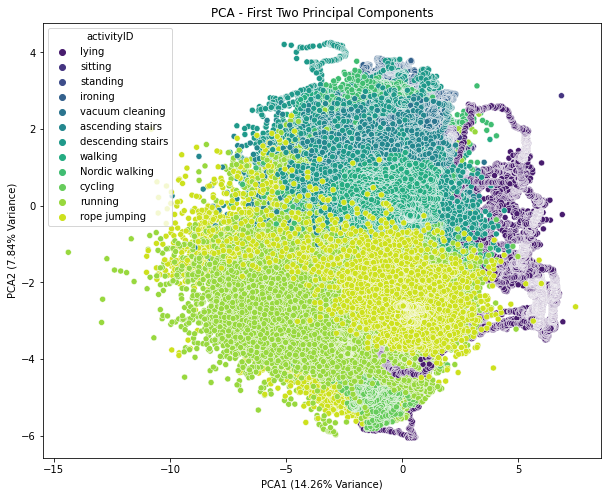

In [16]:
# Plot PCA result for the first two components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue=target, data=data, palette='viridis')
plt.xlabel(f'PCA1 ({explained_variance[0]*100:.2f}% Variance)')
plt.ylabel(f'PCA2 ({explained_variance[1]*100:.2f}% Variance)')
plt.title('PCA - First Two Principal Components')
plt.show()

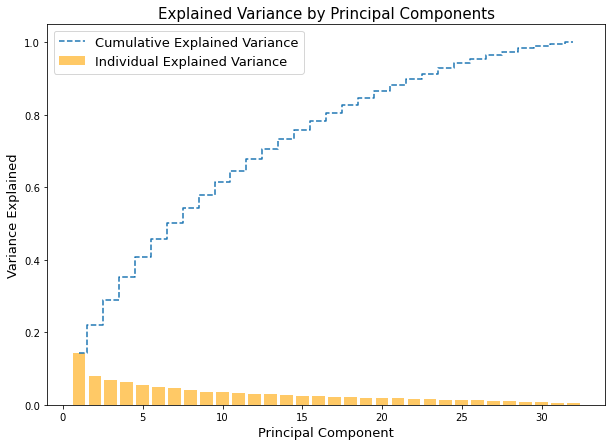

In [17]:
# Plot cumulative and individual explained variance for PCA
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, linestyle='--', drawstyle='steps-mid', label='Cumulative Explained Variance')
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label='Individual Explained Variance', color = 'orange')

plt.xlabel('Principal Component', fontsize = 13)
plt.ylabel('Variance Explained', fontsize = 13)
plt.title('Explained Variance by Principal Components', fontsize = 15)
plt.legend(fontsize = 13)
plt.show()

## Logistic Regression

In [18]:
# Encode target labels
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target_encoded, test_size=0.2, random_state=42, stratify=target_encoded)

In [19]:
# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs')
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Classification Report:
                   precision    recall  f1-score   support

   Nordic walking       0.78      0.78      0.78     37621
 ascending stairs       0.62      0.57      0.59     23443
          cycling       0.94      0.94      0.94     32920
descending stairs       0.62      0.51      0.56     20989
          ironing       0.90      0.93      0.91     47738
            lying       0.98      0.96      0.97     38505
     rope jumping       0.79      0.69      0.73      8594
          running       0.79      0.80      0.80     19640
          sitting       0.90      0.91      0.91     37038
         standing       0.87      0.88      0.87     37986
  vacuum cleaning       0.83      0.83      0.83     35071
          walking       0.81      0.90      0.85     47752

         accuracy                           0.84    387297
        macro avg       0.82      0.81      0.81    387297
     weighted avg       0.84      0.84      0.84    387297

Accuracy Score:
0.842033374903

In [20]:
# Perform Grid Search with CV for logisic regression

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],                    # Regularization strength
    'penalty': [None, 'l2'],            # Regularization type
    'solver': ['lbfgs'],                  # Solver supporting l2 and none penalties
    'max_iter': [1000],                   # Maximum iterations
    'class_weight': [None, 'balanced']    # Adjust weights for imbalanced classes
}

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Display the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on test data
y_pred = grid_search.best_estimator_.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

# Detailed evaluation report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/X/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/X/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/X/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/X/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/X/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/X/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logisti

Best Parameters: {'C': 10, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.8422911672080374
Test Accuracy: 0.8419920629387783
Classification Report:
                    precision    recall  f1-score   support

   Nordic walking       0.78      0.78      0.78     37621
 ascending stairs       0.62      0.57      0.59     23443
          cycling       0.94      0.94      0.94     32920
descending stairs       0.62      0.51      0.56     20989
          ironing       0.90      0.93      0.91     47738
            lying       0.98      0.96      0.97     38505
     rope jumping       0.79      0.69      0.73      8594
          running       0.79      0.80      0.80     19640
          sitting       0.90      0.91      0.91     37038
         standing       0.87      0.88      0.87     37986
  vacuum cleaning       0.83      0.83      0.83     35071
          walking       0.81      0.90      0.85     47752

         accuracy  